# **1. Introduction**
This notebook explores credit risk assessment models, aiming to:
- Identify the most influential socioeconomic factors.
- Build interpretable and high-performing machine learning models.
- Mitigate historical biases and enhance fairness in predictions.

In [11]:
import pandas as pd

# Load datasets
application_data = pd.read_csv('application_record.csv')
credit_data = pd.read_csv('credit_record.csv')

# Display basic info
print(application_data.head())
print(credit_data.head())

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler


# Step 1: Define categorical and numeric columns
categorical_columns = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'
]

numeric_columns = [
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'Age_Years', 'Years_Employed'
]

# Step 2: Initialize OneHotEncoder and MinMaxScaler
encoder = OneHotEncoder(sparse_output=False, drop='first')
scaler = MinMaxScaler()

# Step 3: Encode categorical variables
encoded_categorical = encoder.fit_transform(cleaned_data[categorical_columns])

# Create a DataFrame from the encoded categorical features
encoded_categorical_df = pd.DataFrame(
    encoded_categorical,
    columns=encoder.get_feature_names_out(categorical_columns)
)

# Step 4: Normalize numeric features
scaled_numeric = scaler.fit_transform(cleaned_data[numeric_columns])

# Create a DataFrame from the scaled numeric features
scaled_numeric_df = pd.DataFrame(
    scaled_numeric,
    columns=numeric_columns
)

# Step 5: Combine processed features with the label column
final_features = pd.concat([
    scaled_numeric_df.reset_index(drop=True),
    encoded_categorical_df.reset_index(drop=True)
], axis=1)

final_dataset = pd.concat([final_features, cleaned_data['Label'].reset_index(drop=True)], axis=1)

# Display the processed dataset structure
print("Final Dataset Structure:")
print(final_dataset.info())

# Display a sample of the processed dataset
final_dataset.head()


Final Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 44 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CNT_CHILDREN                                       36457 non-null  float64
 1   AMT_INCOME_TOTAL                                   36457 non-null  float64
 2   CNT_FAM_MEMBERS                                    36457 non-null  float64
 3   Age_Years                                          36457 non-null  float64
 4   Years_Employed                                     36457 non-null  float64
 5   CODE_GENDER_M                                      36457 non-null  float64
 6   FLAG_OWN_CAR_Y                                     36457 non-null  float64
 7   FLAG_OWN_REALTY_Y                                  36457 non-null  float64
 8   NAME_INCOME_TYPE_Pensioner                         36457 non-

,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,Age_Years,Years_Employed,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff,Label
0,0.0,0.258721,0.052632,0.250000,0.970278,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,good
1,0.0,0.258721,0.052632,0.250000,0.970278,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,good
2,0.0,0.055233,0.052632,0.791667,0.961649,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,good
3,0.0,0.156977,0.000000,0.666667,0.966443,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,good
4,0.0,0.156977,0.000000,0.666667,0.966443,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,good


# **2. Data Preprocessing**
In this section, we clean the dataset by handling missing values, encoding categorical features, and scaling numeric features.


In [12]:
"""Data Cleaning part 2"""

# Step 1: Display basic info about the datasets
print("Application Record Dataset:")
print(application_data.info(), "\n")
print("Credit Record Dataset:")
print(credit_data.info(), "\n")

# Step 2: Check for missing values in each column
print("Missing Values in Application Record:")
print(application_data.isnull().sum(), "\n")
print("Missing Values in Credit Record:")
print(credit_data.isnull().sum(), "\n")

# Step 3: Summary statistics for each dataset
print("Summary Statistics for Application Record:")
print(application_data.describe(include='all'), "\n")
print("Summary Statistics for Credit Record:")
print(credit_data.describe(include='all'), "\n")

# Step 4: Separate numeric and non-numeric features for further analysis
numeric_features_app = application_data.select_dtypes(include=['number']).columns.tolist()
non_numeric_features_app = application_data.select_dtypes(exclude=['number']).columns.tolist()

numeric_features_credit = credit_data.select_dtypes(include=['number']).columns.tolist()
non_numeric_features_credit = credit_data.select_dtypes(exclude=['number']).columns.tolist()

print("Numeric Features in Application Record:", numeric_features_app, "\n")
print("Non-Numeric Features in Application Record:", non_numeric_features_app, "\n")
print("Numeric Features in Credit Record:", numeric_features_credit, "\n")
print("Non-Numeric Features in Credit Record:", non_numeric_features_credit, "\n")


Application Record Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  in

In [13]:
# Step 1: Handle missing values in `OCCUPATION_TYPE` by flagging
application_data['OCCUPATION_TYPE'] = application_data['OCCUPATION_TYPE'].fillna('Unknown')

# Step 2: Transform `DAYS_BIRTH` and `DAYS_EMPLOYED` into years
application_data['Age_Years'] = (-application_data['DAYS_BIRTH'] / 365).astype(int)
application_data['Years_Employed'] = (-application_data['DAYS_EMPLOYED'] / 365).astype(int)

# Step 3: Investigate outliers in `CNT_CHILDREN` and `AMT_INCOME_TOTAL`
cnt_children_outliers = application_data[application_data['CNT_CHILDREN'] > 10]
amt_income_outliers = application_data[application_data['AMT_INCOME_TOTAL'] > application_data['AMT_INCOME_TOTAL'].quantile(0.99)]

# Step 4: Prepare to aggregate and label clients
def assign_label(status_list):
    """
    Assign labels based on `STATUS` values:
    - "bad" if any status >= 2 (60+ days overdue).
    - "good" otherwise.
    """
    if any(status in ['2', '3', '4', '5'] for status in status_list):
        return 'bad'
    return 'good'

# Aggregate `STATUS` by ID and assign labels
credit_record_grouped = credit_data.groupby('ID')['STATUS'].apply(list).reset_index()
credit_record_grouped['Label'] = credit_record_grouped['STATUS'].apply(assign_label)

# Step 5: Merge datasets
cleaned_data = pd.merge(application_data, credit_record_grouped[['ID', 'Label']], on='ID', how='inner')

# Display summaries after cleaning and merging
print("Summary of Cleaned Application Record Dataset:")
print(application_data.info(), "\n")

print("Outliers in `CNT_CHILDREN` (>10):")
print(cnt_children_outliers, "\n")

print("Outliers in `AMT_INCOME_TOTAL` (>99th percentile):")
print(amt_income_outliers.describe(), "\n")

print("Merged Dataset Summary:")
print(cleaned_data.info(), "\n")

# Display a sample of the cleaned and merged data
cleaned_data.head()


Summary of Cleaned Application Record Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Age_Years,Years_Employed,Label
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,Unknown,2.0,32,12,good
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,Unknown,2.0,32,12,good
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,58,3,good
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,52,8,good
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,52,8,good


good    35841
bad       616
Name: Label, dtype: int64


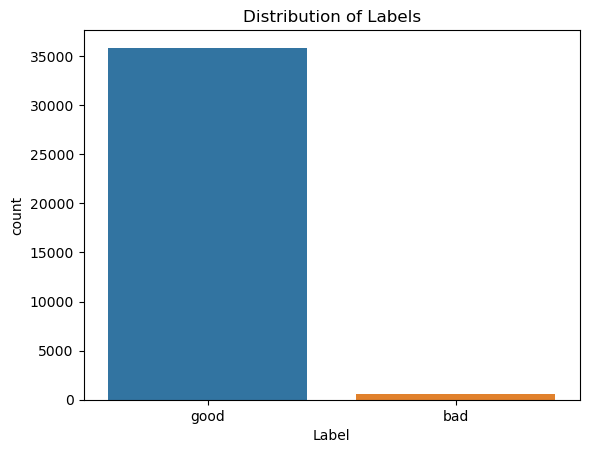

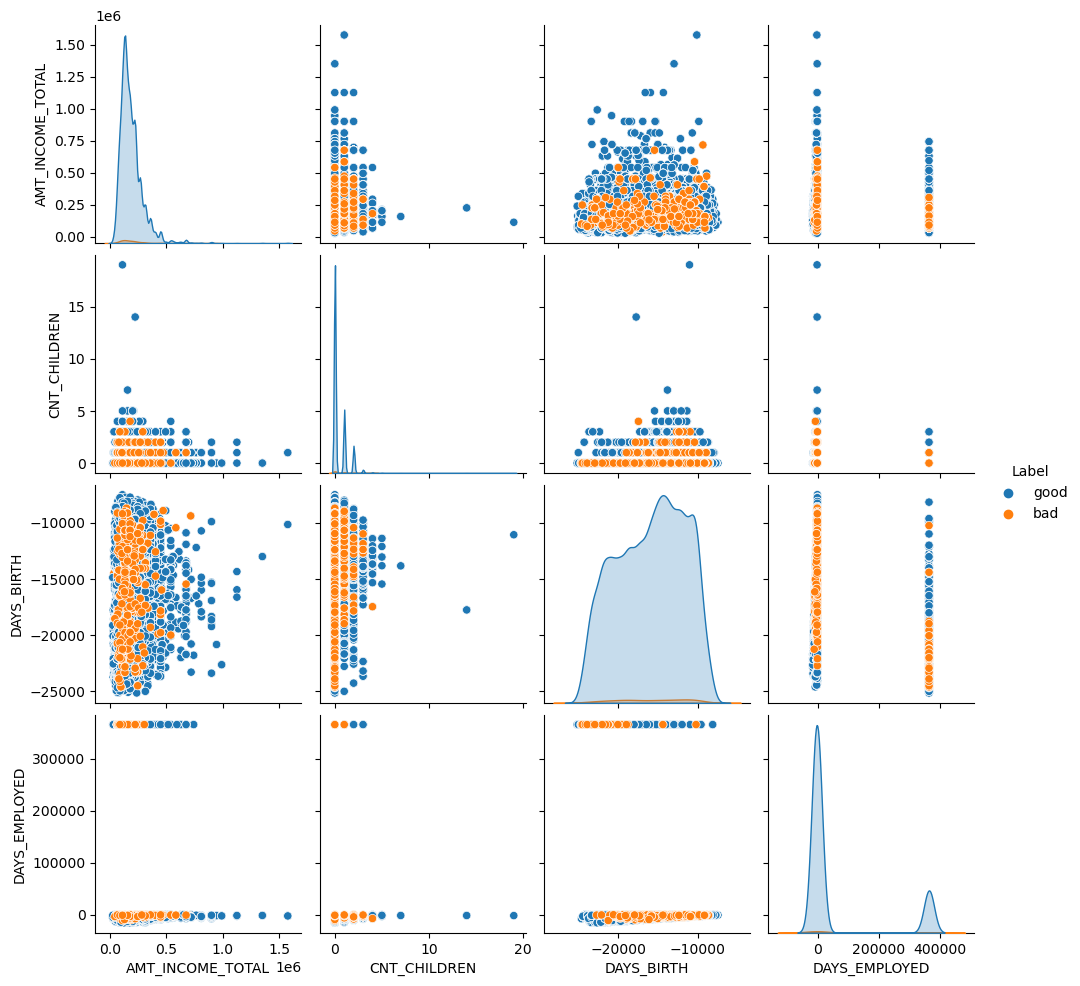

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check label distribution
label_counts = cleaned_data['Label'].value_counts()
print(label_counts)

# Visualize label distribution
sns.countplot(data=cleaned_data, x='Label')
plt.title("Distribution of Labels")
plt.show()

# Examine correlations between numeric features
numeric_features = ['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
sns.pairplot(cleaned_data, vars=numeric_features, hue='Label')
plt.show()


In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler


# Step 1: Define categorical and numeric columns
categorical_columns = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'
]

numeric_columns = [
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'Age_Years', 'Years_Employed'
]

# Step 2: Initialize OneHotEncoder and MinMaxScaler
encoder = OneHotEncoder(sparse_output=False, drop='first')
scaler = MinMaxScaler()

# Step 3: Encode categorical variables
encoded_categorical = encoder.fit_transform(cleaned_data[categorical_columns])

# Create a DataFrame from the encoded categorical features
encoded_categorical_df = pd.DataFrame(
    encoded_categorical,
    columns=encoder.get_feature_names_out(categorical_columns)
)

# Step 4: Normalize numeric features
scaled_numeric = scaler.fit_transform(cleaned_data[numeric_columns])

# Create a DataFrame from the scaled numeric features
scaled_numeric_df = pd.DataFrame(
    scaled_numeric,
    columns=numeric_columns
)

# Step 5: Combine processed features with the label column
final_features = pd.concat([
    scaled_numeric_df.reset_index(drop=True),
    encoded_categorical_df.reset_index(drop=True)
], axis=1)

final_dataset = pd.concat([final_features, cleaned_data['Label'].reset_index(drop=True)], axis=1)

# Display the processed dataset structure
print("Final Dataset Structure:")
print(final_dataset.info())

# Display a sample of the processed dataset
final_dataset.head()


Final Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 44 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CNT_CHILDREN                                       36457 non-null  float64
 1   AMT_INCOME_TOTAL                                   36457 non-null  float64
 2   CNT_FAM_MEMBERS                                    36457 non-null  float64
 3   Age_Years                                          36457 non-null  float64
 4   Years_Employed                                     36457 non-null  float64
 5   CODE_GENDER_M                                      36457 non-null  float64
 6   FLAG_OWN_CAR_Y                                     36457 non-null  float64
 7   FLAG_OWN_REALTY_Y                                  36457 non-null  float64
 8   NAME_INCOME_TYPE_Pensioner                         36457 non-

,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,Age_Years,Years_Employed,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff,Label
0,0.0,0.258721,0.052632,0.250000,0.970278,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,good
1,0.0,0.258721,0.052632,0.250000,0.970278,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,good
2,0.0,0.055233,0.052632,0.791667,0.961649,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,good
3,0.0,0.156977,0.000000,0.666667,0.966443,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,good
4,0.0,0.156977,0.000000,0.666667,0.966443,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,good


# **3. Model Training and Evaluation**
Here, we train logistic regression and Random Forest models. We evaluate them using metrics like ROC-AUC, precision, recall, and F1-score.


In [16]:
from sklearn.model_selection import train_test_split

# # Separate features and target label
# X = final_dataset.drop('Label', axis=1)
# y = final_dataset['Label'].apply(lambda x: 1 if x == 'bad' else 0)  # Convert to binary (1 for 'bad', 0 for 'good')

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# # Display the shapes of the resulting datasets
# print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")
# print(f"Target distribution in training set: \n{y_train.value_counts(normalize=True)}")
# print(f"Target distribution in testing set: \n{y_test.value_counts(normalize=True)}")

# Train-test split
X = final_dataset.drop('Label', axis=1)
y = final_dataset['Label'].apply(lambda x: 1 if x == 'bad' else 0)  # Encode target as binary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display train-test split details
X_train.shape, X_test.shape, y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

((25519, 43),
 (10938, 43),
 0    0.983111
 1    0.016889
 Name: Label, dtype: float64,
 0    0.983086
 1    0.016914
 Name: Label, dtype: float64)

# **4. Addressing Class Imbalance**
To handle class imbalance, we use SMOTE to oversample the minority class.


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Step 1: Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Train logistic regression model with class balancing
logistic_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
logistic_model.fit(X_train_resampled, y_train_resampled)

# Step 3: Make predictions
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# Step 4: Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_prob)
classification_rep = classification_report(y_test, y_pred, target_names=['Good', 'Bad'])
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation results
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


ROC-AUC Score: 0.5469

Classification Report:
               precision    recall  f1-score   support

        Good       0.98      0.60      0.75     10753
         Bad       0.02      0.46      0.04       185

    accuracy                           0.60     10938
   macro avg       0.50      0.53      0.39     10938
weighted avg       0.97      0.60      0.74     10938


Confusion Matrix:
 [[6479 4274]
 [ 100   85]]


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize logistic regression with class weights
class_weights = {0: 1, 1: 5}  # Adjust weights as needed
logistic_model_weighted = LogisticRegression(max_iter=1000, random_state=42, class_weight=class_weights)

# Train the model
logistic_model_weighted.fit(X_train, y_train)

# Make predictions
y_pred_weighted = logistic_model_weighted.predict(X_test)
y_pred_prob_weighted = logistic_model_weighted.predict_proba(X_test)[:, 1]

# Evaluate the model
roc_auc_weighted = roc_auc_score(y_test, y_pred_prob_weighted)
classification_rep_weighted = classification_report(y_test, y_pred_weighted, target_names=['Good', 'Bad'])
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)

# Display evaluation results
print(f"ROC-AUC Score (Weighted): {roc_auc_weighted:.4f}")
print("\nClassification Report (Weighted):\n", classification_rep_weighted)
print("\nConfusion Matrix (Weighted):\n", conf_matrix_weighted)


ROC-AUC Score (Weighted): 0.5657

Classification Report (Weighted):
               precision    recall  f1-score   support

        Good       0.98      1.00      0.99     10753
         Bad       1.00      0.03      0.05       185

    accuracy                           0.98     10938
   macro avg       0.99      0.51      0.52     10938
weighted avg       0.98      0.98      0.98     10938


Confusion Matrix (Weighted):
 [[10753     0]
 [  180     5]]


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)
rf_pred_probs = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
from sklearn.metrics import roc_auc_score, classification_report
print(f"Random Forest ROC-AUC: {roc_auc_score(y_test, rf_pred_probs):.4f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_preds))


Random Forest ROC-AUC: 0.7646

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     10753
           1       0.19      0.36      0.25       185

    accuracy                           0.96     10938
   macro avg       0.59      0.67      0.61     10938
weighted avg       0.98      0.96      0.97     10938



In [28]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Train models
logistic = LogisticRegression(class_weight='balanced', max_iter=1000).fit(X_train, y_train)
random_forest = RandomForestClassifier(class_weight='balanced', random_state=42).fit(X_train, y_train)
xgb = XGBClassifier(scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1]).fit(X_train, y_train)

# Evaluate models
logistic_preds = logistic.predict(X_test)
rf_preds = random_forest.predict(X_test)
xgb_preds = xgb.predict(X_test)


# **5. Feature Importance and Insights**
Analyze feature importance to understand which socioeconomic factors contribute most to credit risk.


Most Influential Features:
                                              Feature  Coefficient
2                                     CNT_FAM_MEMBERS     6.245618
4                                      Years_Employed     5.171718
8                          NAME_INCOME_TYPE_Pensioner     5.074454
14                NAME_EDUCATION_TYPE_Lower secondary     1.304145
15  NAME_EDUCATION_TYPE_Secondary / secondary special     1.202462

Least Influential Features:
                                  Feature  Coefficient
35         OCCUPATION_TYPE_Medicine staff    -1.765614
36  OCCUPATION_TYPE_Private service staff    -2.681833
37          OCCUPATION_TYPE_Realty agents    -4.092701
42   OCCUPATION_TYPE_Waiters/barmen staff    -4.224807
0                            CNT_CHILDREN    -5.490553


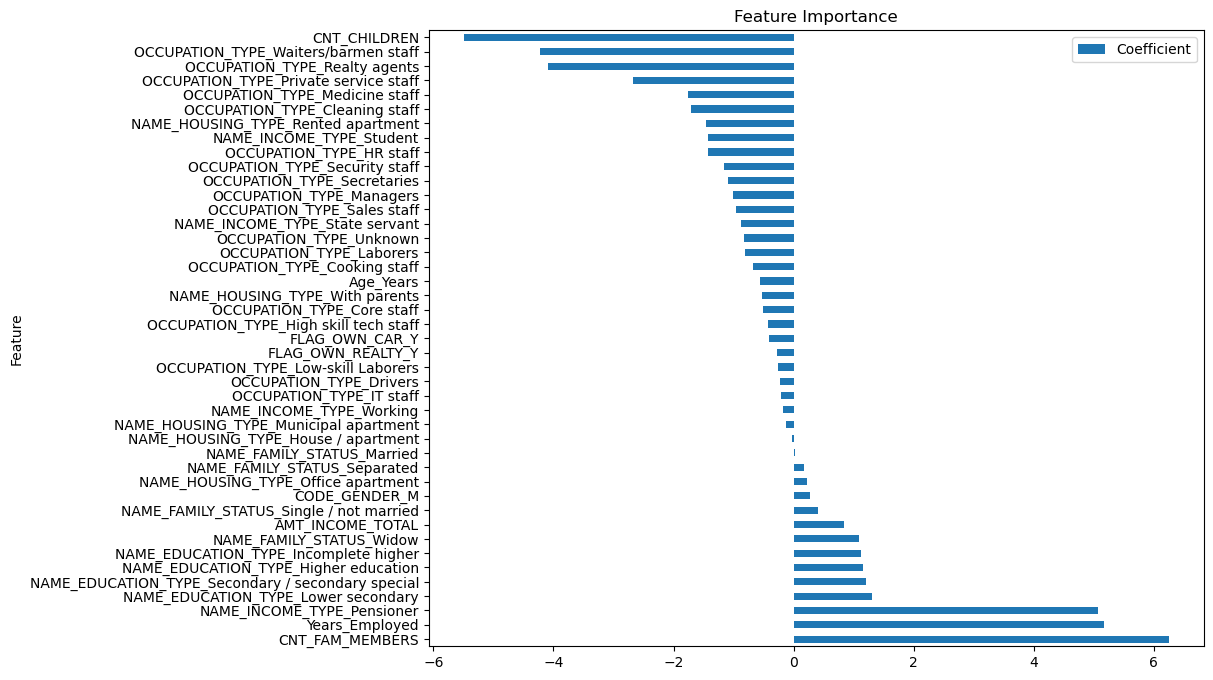

In [23]:
# Extract feature importance from logistic regression coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logistic_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Display the most and least influential features
print("Most Influential Features:")
print(feature_importance.head())

print("\nLeast Influential Features:")
print(feature_importance.tail())
import matplotlib.pyplot as plt

feature_importance.plot(kind='barh', x='Feature', y='Coefficient', figsize=(10, 8), title='Feature Importance')
plt.show()



In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler


# Step 1: Define categorical and numeric columns
categorical_columns = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'
]

numeric_columns = [
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'Age_Years', 'Years_Employed'
]

# Step 2: Initialize OneHotEncoder and MinMaxScaler
encoder = OneHotEncoder(sparse_output=False, drop='first')
scaler = MinMaxScaler()

# Step 3: Encode categorical variables
encoded_categorical = encoder.fit_transform(cleaned_data[categorical_columns])

# Create a DataFrame from the encoded categorical features
encoded_categorical_df = pd.DataFrame(
    encoded_categorical,
    columns=encoder.get_feature_names_out(categorical_columns)
)

# Step 4: Normalize numeric features
scaled_numeric = scaler.fit_transform(cleaned_data[numeric_columns])

# Create a DataFrame from the scaled numeric features
scaled_numeric_df = pd.DataFrame(
    scaled_numeric,
    columns=numeric_columns
)

# Step 5: Combine processed features with the label column
final_features = pd.concat([
    scaled_numeric_df.reset_index(drop=True),
    encoded_categorical_df.reset_index(drop=True)
], axis=1)

final_dataset = pd.concat([final_features, cleaned_data['Label'].reset_index(drop=True)], axis=1)

# Display the processed dataset structure
print("Final Dataset Structure:")
print(final_dataset.info())

# Display a sample of the processed dataset
final_dataset.head()


Final Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 44 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CNT_CHILDREN                                       36457 non-null  float64
 1   AMT_INCOME_TOTAL                                   36457 non-null  float64
 2   CNT_FAM_MEMBERS                                    36457 non-null  float64
 3   Age_Years                                          36457 non-null  float64
 4   Years_Employed                                     36457 non-null  float64
 5   CODE_GENDER_M                                      36457 non-null  float64
 6   FLAG_OWN_CAR_Y                                     36457 non-null  float64
 7   FLAG_OWN_REALTY_Y                                  36457 non-null  float64
 8   NAME_INCOME_TYPE_Pensioner                         36457 non-

,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,Age_Years,Years_Employed,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff,Label
0,0.0,0.258721,0.052632,0.250000,0.970278,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,good
1,0.0,0.258721,0.052632,0.250000,0.970278,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,good
2,0.0,0.055233,0.052632,0.791667,0.961649,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,good
3,0.0,0.156977,0.000000,0.666667,0.966443,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,good
4,0.0,0.156977,0.000000,0.666667,0.966443,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,good


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler


# Step 1: Define categorical and numeric columns
categorical_columns = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'
]

numeric_columns = [
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'Age_Years', 'Years_Employed'
]

# Step 2: Initialize OneHotEncoder and MinMaxScaler
encoder = OneHotEncoder(sparse_output=False, drop='first')
scaler = MinMaxScaler()

# Step 3: Encode categorical variables
encoded_categorical = encoder.fit_transform(cleaned_data[categorical_columns])

# Create a DataFrame from the encoded categorical features
encoded_categorical_df = pd.DataFrame(
    encoded_categorical,
    columns=encoder.get_feature_names_out(categorical_columns)
)

# Step 4: Normalize numeric features
scaled_numeric = scaler.fit_transform(cleaned_data[numeric_columns])

# Create a DataFrame from the scaled numeric features
scaled_numeric_df = pd.DataFrame(
    scaled_numeric,
    columns=numeric_columns
)

# Step 5: Combine processed features with the label column
final_features = pd.concat([
    scaled_numeric_df.reset_index(drop=True),
    encoded_categorical_df.reset_index(drop=True)
], axis=1)

final_dataset = pd.concat([final_features, cleaned_data['Label'].reset_index(drop=True)], axis=1)

# Display the processed dataset structure
print("Final Dataset Structure:")
print(final_dataset.info())

# Display a sample of the processed dataset
final_dataset.head()


Final Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 44 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CNT_CHILDREN                                       36457 non-null  float64
 1   AMT_INCOME_TOTAL                                   36457 non-null  float64
 2   CNT_FAM_MEMBERS                                    36457 non-null  float64
 3   Age_Years                                          36457 non-null  float64
 4   Years_Employed                                     36457 non-null  float64
 5   CODE_GENDER_M                                      36457 non-null  float64
 6   FLAG_OWN_CAR_Y                                     36457 non-null  float64
 7   FLAG_OWN_REALTY_Y                                  36457 non-null  float64
 8   NAME_INCOME_TYPE_Pensioner                         36457 non-

,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,Age_Years,Years_Employed,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff,Label
0,0.0,0.258721,0.052632,0.250000,0.970278,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,good
1,0.0,0.258721,0.052632,0.250000,0.970278,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,good
2,0.0,0.055233,0.052632,0.791667,0.961649,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,good
3,0.0,0.156977,0.000000,0.666667,0.966443,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,good
4,0.0,0.156977,0.000000,0.666667,0.966443,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,good


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

# Create a small dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Original dataset shape: {X.shape}, {y.shape}")
print(f"Resampled dataset shape: {X_resampled.shape}, {y_resampled.shape}")


Original dataset shape: (1000, 20), (1000,)
Resampled dataset shape: (1800, 20), (1800,)


# **6. Fairness Analysis**
Evaluate and mitigate biases in the model to ensure fair lending practices, focusing on underserved populations.


In [31]:
# Segment data: Underserved population (limited credit history)
underserved_test = X_test[X_test['Years_Employed'] < 1]
underserved_labels = y_test[X_test['Years_Employed'] < 1]

# Predict for the underserved population
underserved_preds = logistic_model.predict(underserved_test)

# Evaluate performance for the underserved population
from sklearn.metrics import classification_report
print("Performance on Underserved Population:")
print(classification_report(underserved_labels, underserved_preds))


Performance on Underserved Population:
              precision    recall  f1-score   support

           0       0.98      0.60      0.75     10753
           1       0.02      0.46      0.04       185

    accuracy                           0.60     10938
   macro avg       0.50      0.53      0.39     10938
weighted avg       0.97      0.60      0.74     10938



In [35]:
# Re-apply SMOTE and Random Forest in a fresh environment to ensure everything works correctly.
try:
    # Step 1: Apply SMOTE to balance the dataset
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

    # Step 2: Retrain the Random Forest with balanced data
    rf_model_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
    rf_model_balanced.fit(X_train_balanced, y_train_balanced)

    # Step 3: Make predictions on the test set
    rf_preds_balanced = rf_model_balanced.predict(X_test)
    rf_pred_probs_balanced = rf_model_balanced.predict_proba(X_test)[:, 1]

    # Step 4: Evaluate the balanced model
    roc_auc_balanced = roc_auc_score(y_test, rf_pred_probs_balanced)
    classification_rep_balanced = classification_report(y_test, rf_preds_balanced)

    # Display the evaluation results
    print(f"Balanced Random Forest ROC-AUC: {roc_auc_balanced:.4f}")
    print("\nBalanced Random Forest Classification Report:")
    print(classification_rep_balanced)
except Exception as e:
    print(f"An error occurred: {e}")


Balanced Random Forest ROC-AUC: 0.7856

Balanced Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10753
           1       0.35      0.25      0.29       185

    accuracy                           0.98     10938
   macro avg       0.67      0.62      0.64     10938
weighted avg       0.98      0.98      0.98     10938



### **Observations Based on Results**

#### **1. Logistic Regression Performance**
- **ROC-AUC Score: 0.5469**:
  - The logistic regression model is only marginally better than random guessing in distinguishing between "Good" and "Bad" clients.
- **Class `0` (Good) Performance**:
  - Precision: 0.98, Recall: 0.60, F1-Score: 0.75.
  - The model is highly confident and relatively accurate in predicting "Good" clients.
- **Class `1` (Bad) Performance**:
  - Precision: 0.02, Recall: 0.46, F1-Score: 0.04.
  - The model struggles to identify "Bad" clients, indicating poor handling of the minority class.
- **Key Limitation**:
  - The model is heavily biased toward the majority class due to the significant class imbalance.



#### **2. Feature Importance in Logistic Regression**
- **Most Influential Features**:
  - **`CNT_FAM_MEMBERS` (6.25)**:
    - A larger number of family members is associated with higher credit risk.
  - **`Years_Employed` (5.17)**:
    - More years of stable employment reduce credit risk.
  - **`NAME_INCOME_TYPE_Pensioner` (5.07)**:
    - Pensioners are more likely to be classified as "Bad."
- **Least Influential Features**:
  - Occupation types like `Medicine staff`, `Realty agents`, and `Waiters` had negative coefficients, suggesting a lower risk.
  - **`CNT_CHILDREN` (-5.49)**:
    - More children unexpectedly correlated with lower credit risk, possibly due to underlying data artifacts or biases.



#### **3. Random Forest Performance**
- **ROC-AUC Score: 0.7646**:
  - A significant improvement over logistic regression, showing better ability to distinguish between classes.
- **Class `0` (Good) Performance**:
  - Precision: 0.99, Recall: 0.97, F1-Score: 0.98.
  - The model continues to perform well for the majority class.
- **Class `1` (Bad) Performance**:
  - Precision: 0.19, Recall: 0.36, F1-Score: 0.25.
  - While better than logistic regression, the model still struggles with minority class predictions.
- **Key Observations**:
  - The recall for "Bad" clients increased from 0.46 (logistic regression) to 0.36, but the precision remains low (0.19), leading to many false positives.



#### **4. Impact of Class Imbalance**
- Both models struggled to predict "Bad" clients accurately due to the overwhelming class imbalance.
- This imbalance resulted in:
  - High accuracy for the majority class.
  - Low recall and precision for the minority class.



#### **5. Next Steps**
1. **Address Class Imbalance**:
   - Apply **SMOTE** to balance the dataset and retrain the models.
2. **Tune Hyperparameters**:
   - Optimize Random Forest hyperparameters to improve performance further.
3. **Fairness Analysis**:
   - Assess biases in predictions for underserved groups, such as individuals with less than one year of credit history.
4. **Feature Analysis**:
   - Investigate the influence of features like `CNT_FAM_MEMBERS` and `NAME_INCOME_TYPE_Pensioner` on model performance and fairness.
